In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyclifford as pc
from quantum_model import Quantum_Strategy
from tqdm import tqdm
import orjson
from utils import plot_mean_std_shaded
import scienceplots
plt.style.use(['science','no-latex'])
from scipy.stats import binomtest
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
n_list = [10, 20, 50, 100]

In [20]:
res = {}
for n in tqdm(n_list):
    res[n] = []
    for noise in np.linspace(0, 0.03, 50):
        qs = Quantum_Strategy(n, noise=noise)
        data = qs.produce_data(1000, progress_bar=False)
        check = qs.check_input_output(data['X'], data['Y'], flatten=False)
        score = np.mean(np.sum(check, axis=-1) > 0.95 * n)
        std = 1.96 * np.sqrt(score * (1 - score) / len(check)) # 95% confidence interval
        # print(f"noise: {noise:.2f}, score: {score:.2f}")
        res[n].append([noise, score, std])
    res[n] = np.array(res[n])

100%|██████████| 4/4 [47:26<00:00, 711.69s/it] 


In [ ]:
# convert dict key to string
res = {str(k): v for k, v in res.items()}
with open("noisy_quantum_model.json", "wb") as f:
    f.write(orjson.dumps(res, option=orjson.OPT_SERIALIZE_NUMPY))

In [4]:
# read from file
with open("noisy_quantum_model.json", "rb") as f:
    res = orjson.loads(f.read())
    # convert to numpy array
    res = {k: np.array(v) for k, v in res.items()}

In [5]:
n_list = [10, 20, 50]

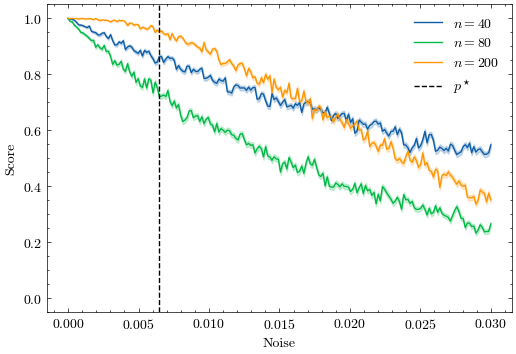

In [6]:
plt.figure(figsize=(6, 4))
for i, n in enumerate(n_list):
    # plt.errorbar(res[str(n)][:, 0], res[str(n)][:, 1], yerr=res[str(n)][:, 2]/10, label=f"n={4*n}", capsize=2)
    # std = []
    # for win in res[str(n)][:, 1]:
    #     ci = binomtest(int(10000*win), 10000).proportion_ci()
    #     print(ci)
    #     std.append((ci[1] - ci[0]) / 2)
    plot_mean_std_shaded(res[str(n)][:, 0], res[str(n)][:, 1], res[str(n)][:, 2], color=f'C{i}', label=f"$n={4*n}$")
    # plt.plot(res[n][:, 0], res[n][:, 1], label=f"n={4 * n}")
plt.vlines(1-(15/16)**(0.1), -0.05, 1.05, color='k', linestyle='--', label=r"$p^\star$")
plt.legend()
plt.xlabel(r"Noise")
plt.ylabel(r"Score")
# plt.xscale('log')
plt.ylim(-0.05, 1.05)
# plt.yscale('log')
plt.savefig("noisy_quantum_model.pdf")
plt.show()